In [5]:
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
table=pq.read_table('data_sample_3w_output.pq').to_pandas()
table=table.loc[table['subreddit']=='WSB']
print(table)

            id                           Post Title       time  Positive cnt  \
1      18dkkml  Google's best Gemini demo was faked 2023-12-08           1.0   
2      18dkkml  Google's best Gemini demo was faked 2023-12-08           0.0   
3      18dkkml  Google's best Gemini demo was faked 2023-12-08           0.0   
4      18dkkml  Google's best Gemini demo was faked 2023-12-08           0.0   
5      18dkkml  Google's best Gemini demo was faked 2023-12-08           0.0   
...        ...                                  ...        ...           ...   
21410   zv32ac  Lumber prices back to normal levels 2022-12-26           0.0   
21411   zv32ac  Lumber prices back to normal levels 2022-12-26           0.0   
21412   zv32ac  Lumber prices back to normal levels 2022-12-26           0.0   
21413   zv32ac  Lumber prices back to normal levels 2022-12-26           0.0   
21414   zv32ac  Lumber prices back to normal levels 2022-12-26           0.0   

                                       

In [25]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range
 
table[['Positive cnt','Negative cnt','Polarity','Subjectivity']]=normalization(table[['Positive cnt','Negative cnt','Polarity','Subjectivity']])
table_group=table.groupby('time')
count_table=[]
for name,group in table_group:
    count_table.append((name,len(group)))
count_table=pd.DataFrame(count_table,columns=['time','n_comments']).set_index('time')

Empty DataFrame
Columns: [n_comments]
Index: []


In [7]:
normalized_columns = ['Positive cnt', 'Negative cnt', 'Polarity', 'Subjectivity']
table_mean = table.groupby('time')[normalized_columns].mean()
table_mean

,Positive cnt,Negative cnt,Polarity,Subjectivity
time,,,,
2015-10-29,0.000000,0.014706,0.375000,0.022727
2016-09-23,0.005797,0.002558,0.521739,0.003228
2016-10-27,0.008805,0.010544,0.481132,0.008105
2016-11-17,0.005490,0.006459,0.492157,0.011189
2016-12-05,0.008333,0.005515,0.515625,0.011590
...,...,...,...,...
2024-03-08,0.005458,0.010141,0.467819,0.011232
2024-03-09,0.005389,0.010649,0.461924,0.010923
2024-03-10,0.008952,0.014238,0.467759,0.010853


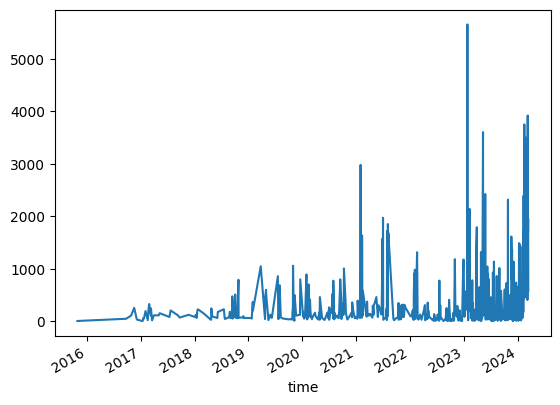

In [8]:
ax1=count_table
plt.figure()
count_table['n_comments'].plot()
plt.show()

In [9]:
stock_index=pd.read_csv('Data_NQROBO.csv')
stock_index.columns=['time','close','open','high','low','volume','var']
stock_index.set_index('time', inplace=True)
stock_index

,close,open,high,low,volume,var
time,,,,,,
2024-3-11,"1,594.20","1,599.93","1,601.70","1,587.05",NaN,-1.15%
2024-3-8,"1,612.67","1,618.76","1,637.96","1,607.61",NaN,-0.34%
2024-3-7,"1,618.21","1,607.07","1,621.79","1,605.32",NaN,0.79%
2024-3-6,"1,605.48","1,581.96","1,614.05","1,581.04",NaN,1.47%
2024-3-5,"1,582.25","1,606.70","1,607.40","1,577.95",NaN,-1.54%
...,...,...,...,...,...,...
2019-1-8,939.72,930.54,941.97,928.93,NaN,1.40%
2019-1-7,926.72,910.56,928.74,909.79,NaN,2.58%
2019-1-4,903.38,874.20,904.48,873.66,NaN,2.61%


In [36]:
# Merge
# count_table['time'] = pd.to_datetime(count_table['time'])
# table_mean['time'] = pd.to_datetime(table_mean['time'])
# stock_index['time'] = pd.to_datetime(stock_index['time'])

merged_table = pd.merge(count_table, table_mean, on='time', how='outer')
final_table = pd.merge(merged_table, stock_index, left_index=True, right_index=True,how='outer')
print(final_table)

            n_comments  Positive cnt  Negative cnt  Polarity  Subjectivity  \
time                                                                         
2015-10-29         4.0      0.000000      0.014706  0.375000      0.022727   
2016-09-23        46.0      0.005797      0.002558  0.521739      0.003228   
2016-10-27       106.0      0.008805      0.010544  0.481132      0.008105   
2016-11-17       255.0      0.005490      0.006459  0.492157      0.011189   
2016-12-05        32.0      0.008333      0.005515  0.515625      0.011590   
...                ...           ...           ...       ...           ...   
2024-03-08      3921.0      0.005458      0.010141  0.467819      0.011232   
2024-03-09      2994.0      0.005389      0.010649  0.461924      0.010923   
2024-03-10      1698.0      0.008952      0.014238  0.467759      0.010853   
2024-03-11      1960.0      0.003878      0.007443  0.473903      0.010050   
2024-03-12       574.0      0.003020      0.008813  0.464286    

In [37]:
final_table['close'] = final_table['close'].astype(str)
final_table['close'] = final_table['close'].str.replace(',', '').astype(float)

final_table.index = pd.to_datetime(final_table.index)
final_table = final_table.loc[(final_table.index >= '2023-01-01') & (final_table.index <= '2024-03-01')]
final_table

,n_comments,Positive cnt,Negative cnt,Polarity,Subjectivity,close,open,high,low,volume,var
time,,,,,,,,,,,
2023-01-02,NaN,NaN,NaN,NaN,NaN,1263.93,"1,256.27","1,265.53","1,255.58",NaN,0.74%
2023-01-03,NaN,NaN,NaN,NaN,NaN,1264.37,"1,267.17","1,290.00","1,256.85",NaN,0.03%
2023-01-04,84.0,0.006349,0.012605,0.464286,0.014121,1281.65,"1,264.18","1,287.73","1,263.15",NaN,1.37%
2023-01-05,NaN,NaN,NaN,NaN,NaN,1260.69,"1,281.45","1,285.18","1,259.64",NaN,-1.64%
2023-01-06,NaN,NaN,NaN,NaN,NaN,1283.15,"1,261.94","1,288.35","1,254.60",NaN,1.78%
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26,3167.0,0.006547,0.009603,0.474969,0.009134,1583.78,"1,568.15","1,587.08","1,565.68",NaN,1.46%
2024-02-27,2788.0,0.009158,0.019200,0.440890,0.012272,1597.92,"1,586.79","1,600.91","1,584.32",NaN,0.89%
2024-02-28,2383.0,0.007302,0.011182,0.471688,0.011368,1587.24,"1,596.30","1,596.56","1,578.43",NaN,-0.67%


In [38]:
import plotly.graph_objs as go


trace1 = go.Scatter(x=final_table.index, y=final_table['Polarity'], name='Polarity', yaxis='y1',connectgaps=True)
trace2 = go.Scatter(x=final_table.index, y=final_table['Subjectivity'], name='Subjectivity', yaxis='y1',connectgaps=True)

layout = go.Layout(title='Polarity and Subjectivity Over Time',
                   xaxis=dict(title='Time'),
                   yaxis=dict(title='Polarity', side='left', rangemode='tozero'),
                   yaxis2=dict(title='Subjectivity', side='right', overlaying='y', rangemode='tozero'))

fig = go.Figure(data=[trace1, trace2], layout=layout)

fig.show()


In [39]:
import plotly.graph_objs as go

# 创建 traces
trace_polarity = go.Scatter(x=final_table.index, y=final_table['Polarity'], mode='lines', name='Polarity', yaxis='y1',connectgaps=True)
trace_subjectivity = go.Scatter(x=final_table.index, y=final_table['Subjectivity'], mode='lines', name='Subjectivity', yaxis='y1',connectgaps=True)
trace_close = go.Scatter(x=final_table.index, y=final_table['close'], mode='lines', name='Close', yaxis='y2',connectgaps=True)

# 创建布局
layout = go.Layout(
    title='Polarity, Subjectivity, and Close Over Time',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Polarity/Subjectivity', side='left', rangemode='tozero'),
    yaxis2=dict(title='Close', side='right', overlaying='y', rangemode='tozero')
)

# 组合 traces
fig = go.Figure(data=[trace_polarity, trace_subjectivity, trace_close], layout=layout)

# 显示图表
fig.show()


In [41]:
final_table[['Polarity','Subjectivity','close']].to_parquet("Sentiment_index.parquet")